<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/Amostragem_e_integracao_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Amostragem de Monte Carlo pelo Método da Inversão




### Exemplo 1: ***A distribuição Exponencial por amostragem***





A PDF da exponencial é definida como:

\begin{equation*}
f(t) =
\begin{cases}
 \frac{1}{\tau}e^{-t/\tau} \text{, se }  t\geq 0 \\
 0\text{, se }  t<0 
\end{cases}
\end{equation*}


Para essa distribuição a CDF é dada por 

\begin{equation*}
F(t) = \int_{0}^t \frac{1}{\tau}e^{-t'/\tau} dt' = 1 - e^{-t/\tau} 
\end{equation*}

Como sabemos, a função inversa da CDF, $F^{-1}(u)$,  leva a uma variável aleatória uniforme. Sendo assim, ao inverter $u=F(t)$, obtemos

\begin{equation*}
u = 1 - e^{-t/\tau}  \Rightarrow  \boxed{ t = -\tau \ln{(1-u)} }
\end{equation*}





Histograma da amostragem da distribuição exponencial:

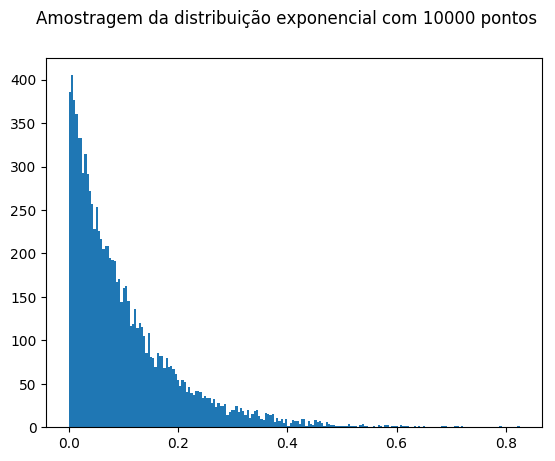

In [1]:
#@title
# Amostragem de MC de uma distribuição Exponencial pelo Método da Inversão
from numpy.random import random
from numpy import log
import matplotlib.pyplot as plt
plt.style.use('default') # para plots bonitinhos
# número de pontos
np=10000
# número de bins do histograma
nbins=200
# Vida média
tau=0.1
# Função CDF Inversa
def invCDF(u):
   return -tau*log(1-u)
# Amostragem da CDF inversa, usando uma distribuição uniforme 
sample = [invCDF(random()) for _ in range(np)]
# plotar a distribuição da CDF inversa com uma dist uniforme
plt.hist(sample,bins=nbins)
plt.suptitle("Amostragem da distribuição exponencial com "+str(np)+" pontos")
plt.show()


Histograma da amostragem da distribuição exponencial, com a pdf da exponencial sobreposta:

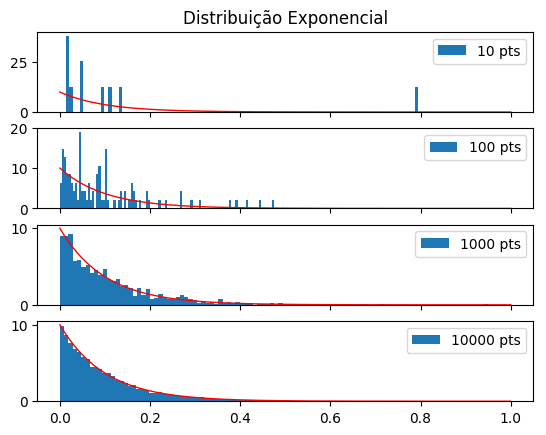

In [2]:
# MC Sampling an Exponential distribution by Invertion Method
import numpy as np
from numpy.random import random
from scipy.stats import expon
import matplotlib.pyplot as plt
plt.style.use('default') # para plots bonitinhos

# Inverse CDF function
#Como boa prática de Python, definimos todas as funções no começo do script!
def invCDF(u):
   return -tau*np.log(u)

# lista com diferentes números de pontos
npts=[10, 100, 1000, 10000]
# número de bins dos histogramas
nbins = 100
# Vida Média
tau=0.1
# Cria uma figura que contém subplots sobrepostos (Histograma e Exponencial)
fig, ax = plt.subplots(len(npts), sharex=True)
ax[0].set_title('Distribuição Exponencial')
# cria um plot da distribuição exponencial
x = np.linspace(0,1,1000)
y = expon.pdf(x, scale=tau) # equivalente a y = (1/tau)*np.exp(-x/tau)

# Amostra de CDF inversa usando uma distribuição uniforme 
for i in range(len(npts)):
    sample = [invCDF(random()) for _ in range(npts[i])]
    # cria um histograma com os dados de amostragem
    ax[i].hist(sample,bins=nbins,density=1,label=str(npts[i])+" pts")
    ax[i].plot(x,y,color='red',linewidth=1)
    ax[i].legend(loc="upper right")

# show plot
plt.show()


### Exemplo 2: ***Criando uma distribuição de Breit-Wigner por amostragem*** 



A PDF da Breit-Wigner é definida cmo 

\begin{equation*}
f(x) =\frac{2}{\pi}\frac{\Gamma}{4(x-a)^2+\Gamma^2} 
\end{equation*}


Para essa distribuição a CDF é dada por 

\begin{equation*}
F(x) = \frac{2}{\pi \Gamma} \int_{-\infty}^x \frac{\Gamma^2}{4(x'-a)^2+\Gamma^2} dx' 
\end{equation*}


Para fazer a integração, faremos a mudança de variáveis $y=2(x-a)/\Gamma \Rightarrow  dy=(2/\Gamma)dx$ , obtendo assim

\begin{align*}
F(x) &= \frac{1}{\pi} \int_{-\infty}^{2(x-a)/\Gamma } \frac{1}{y^2+1} dy = \frac{1}{\pi} \arctan{(y)}~\bigg|_{y=-\infty}^{y=2(x-a)/\Gamma} \\
       &= \frac{ \arctan{\left( 2(x-a)/\Gamma \right)} }{\pi} +\frac{1}{2}
\end{align*}



Invertendo a CDF $u=F(x)$ , obtemos

\begin{align*}
F^{-1}(u) &= a+ \frac{\Gamma}{2}  \tan{\left[ \pi \left( u - \frac{1}{2} \right) \right]} 
\end{align*}




Plot do histograma de amostragem sobreposto com a PDF da Breit-Wigner

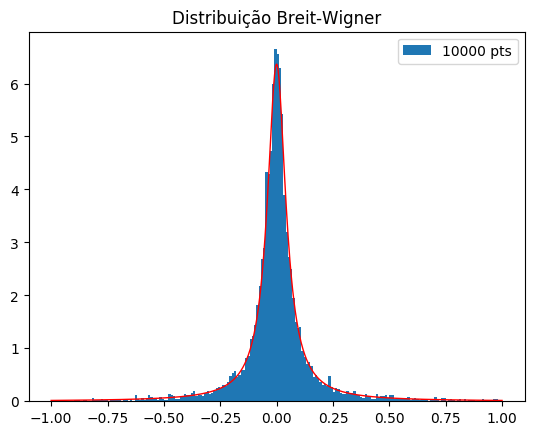

In [3]:
# MC Sampling an Exponential distribution by Invertion Method
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

# função CDF Inversa
def invCDF(u, a, gamma):
   return ( a+0.5*gamma*np.tan( np.pi*(u-0.5) ) )

# número de pontos
npts=10000
# número de bins do histograma
nbins=200
# parâmetros da Breit-Wigner (width and pole)
gamma=0.1
a=0

# amostragem da CDF inversa usando uma distribuição uniforme 
sample = [invCDF(random(), a, gamma) for _ in range(npts)]
# criar a figura contendo os subplots sobrepostos (Histograma e B-W)
fig, ax = plt.subplots()
ax.set_title('Distribuição Breit-Wigner')
# criar um histograma com os dados
xmin=a-10*gamma
xmax=a+10*gamma
ax.hist(sample,bins=nbins,range=[xmin,xmax],density=1,label=str(npts)+" pts")
ax.legend(loc="upper right")
# criar um plot da distribuição B-W
x = np.linspace(xmin,xmax,1000)
y = 2/np.pi * gamma/( 4*(x-a)**2 + gamma**2 ) 
ax.plot(x,y,color='red',linewidth=1)
# show plot
plt.show()


## Amostragem de Monte Carlo pelo Método de Aceitação-Rejeição


### Exemplo 1: ***Amostragem da distribuição Gaussiana***



A PDF gaussiana é definida como 

\begin{equation*}
f(x) = \frac{1}{ \sqrt{2\pi} \sigma } e^{-\frac{x^2}{2\sigma^2} }
\end{equation*}



Essa função tem uma CDF que não é expresa em termos de uma função elementar e é muito difícil encontrar sua inversa. Mas é bastante simples de se construir, usando o método de aceitação-rejeição.

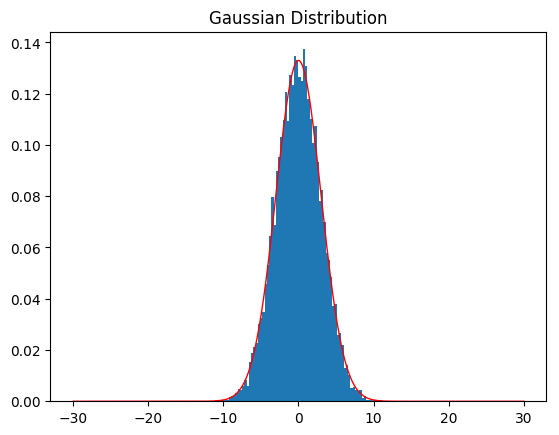

Sampling Efficiency= 12 %


In [4]:
# MC Sampling of a Gaussian distribution by Acceptance-Rejection Method
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
# number of points
npts=10000
# number of histogram bins
nbins=200
# Gaussian width and mean
sigma=3.0
mean=0
# Gaussian function definition
def gaussian(u):
   return  1/(( 2*np.pi )**0.5*sigma)*np.exp( -(u-mean)**2/(2*sigma**2) ) 
# Sampling range
xmin=mean-10*sigma
xmax=mean+10*sigma
ymax=gaussian(mean)
# Accept or Reject the points
sample=[]
naccept=0
ntot=0
while naccept<npts:  
  ntot+=1
  x=np.random.uniform(xmin,xmax) # x'  
  y=np.random.uniform(0,ymax) # y'
  if y<gaussian(x): 
      sample.append(x)  
      naccept+=1
# Create a numpy array with the list of selected points
sample=np.array(sample)     
# create a figure containing overlaid subplots (Histogram and Exponential)
fig, ax = plt.subplots()
ax.set_title('Gaussian Distribution')
# create a histogram with sampled data
ax.hist(sample,nbins,range=[xmin,xmax],density=1)
# create a plot of the exponential distribution
x = np.linspace(xmin,xmax,1000)
y = gaussian(x)
ax.plot(x,y,color='red',linewidth=1)
# show plot
plt.show()
print("Sampling Efficiency=",int(naccept/ntot*100),"%")


##   Amostragem por rejeição eficiente (MC Importance Sampling)



**Problema  1**: Como usar a "importance sampling" para melhorar a eficiência de amostragem da Gaussiana? **Use o Método de Box-Muller como gerador de números aleatórios de uma Gaussiana**

**Problema 2**: Encontrar um algoritmo que gere uma variável aleatória x, distribuída de acordo com a seguinte PDF:


$f(x) = Ce^{-\lambda x}cos^2(kx)$


onde C é uma constante de normalização e $\lambda$ e $k$ são dois parâmetros conhecidos.

Podemos tomar a função $Ce^{-\lambda x}$ como a função "envelope" $g(x)$ e gerar números aleatórios de acordo com a distribuição exponencial, pelo ***método de inversão***. Em seguida, com o ***método de Aceitação-Rejeição***, aceitamos ou rejeitamos x de acordo com $cos^2kx$. A distribuição de probabilidade, sendo os dois processos independentes, é o produto das duas distribuições.

Para obter a variável aleatória $x$ da distribuição 'envelope' com o método da inversão, partimos da distribuição exponencial. A CDF da distribuição é dada por:

$\\$

$F(x) = \int_{0}^{x}g(x')dx' = \int_{0}^{x}Ce^{-\lambda x'} dx' = 1-e^{-\lambda x}$

$\\$

Invertendo $F(x)$, temos

$\\$

$u = 1 - e^{-\lambda x} \Rightarrow x = -log(1 - r)/\lambda$


$\\$

Em resumo, para obter a distribuição de $f(x)$ pelo método de "importance sampling":

1 - Gerar $r$ uniformemente entre [0,1[ ;

2 - Calcular $x = -log(1 - r)/\lambda$ ;

3 - Gerar $s$ uniformemente entre [0,1[ ;

4 - Se $s < cos^2kx$, guardar $x$, se não, retornar ao item 1.

-0.0 92.10340371976294


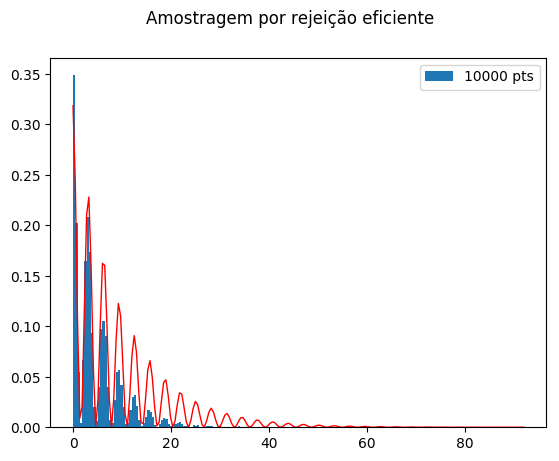

eficiencia = 8.015582291975601 %


In [5]:
# Amostragem de MC de uma distribuição Exponencial pelo Método da Inversão
import numpy as np
from numpy.random import random
from numpy import log
import matplotlib.pyplot as plt
plt.style.use('default') # para plots bonitinhos

# Função CDF Inversa
def invCDF(u, lamb):
   return -log(1-u)/lamb

# Função da 'importance sampling'
def f(x, lamb, k):
    return (1/np.pi)*np.exp(-lamb*x)*(np.cos(k*x))**2 
  
# número de pontos
npts=10000
# número de bins do histograma
nbins=200
# Vida média
lamb=0.1
# k
k = 1
xmin=invCDF(0, lamb)
xmax=invCDF(.9999, lamb)
print(xmin, xmax)
# Amostra resultante do método de aceitação-rejeição 
sample = []
naccept=0
ntot=0
while naccept<npts:  
  ntot+=1
  s=np.random.uniform(0,1) # s  
  x=invCDF(np.random.uniform(0,1), lamb) # x
  if s<f(x, lamb, k): 
      sample.append(x)  
      naccept+=1
      
# plotar a distribuição da CDF inversa com uma dist uniforme
plt.hist(sample,bins=nbins, range=[xmin, xmax], density=1,label=str(npts)+" pts")
#plotar a distribuição
x = np.linspace(xmin,xmax,nbins)
y = f(x, lamb, k)
plt.plot(x, y, color='red',linewidth=1)
plt.suptitle("Amostragem por rejeição eficiente")
plt.legend(loc="upper right")
plt.show()
print("eficiencia = {} %".format(naccept/ntot*100))


Distribuição de $f(x)$ pelo método de Aceitação-Rejeição

0 40


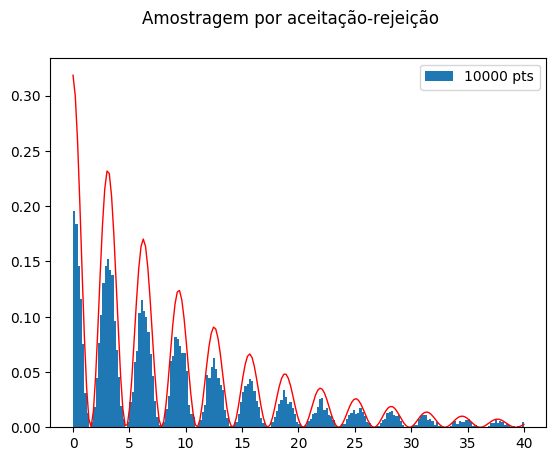

eficiencia = 3.9554615034709175 %


In [6]:
# Amostragem de MC de uma distribuição Exponencial pelo Método da Inversão
import numpy as np
from numpy.random import random
from numpy import log
import matplotlib.pyplot as plt
plt.style.use('default') # para plots bonitinhos

# Função
def f(x, lamb, k):
    return (1/np.pi)*np.exp(-lamb*x)*(np.cos(k*x))**2  
  
# número de pontos
npts=10000
# número de bins do histograma
nbins=200
# Vida média
lamb=0.1
# k
k = 1
xmin=0
xmax=40
print(xmin, xmax)
# Amostra resultante do método de aceitação-rejeição 
sample = []
naccept=0
ntot=0
while naccept<npts:  
  ntot+=1
  x=np.random.uniform(xmin,xmax) # s  
  y=np.random.uniform(0,1) # x
  if y<f(x, lamb, k): 
      sample.append(x)  
      naccept+=1
      
# plotar a distribuição da CDF inversa com uma dist uniforme
plt.hist(sample,bins=nbins, range=[xmin, xmax], density=True,label=str(npts)+" pts")
#plotar a distribuição
x = np.linspace(xmin,xmax,nbins)
y = f(x, lamb, k)
plt.plot(x, y, color='red',linewidth=1)
plt.suptitle("Amostragem por aceitação-rejeição")
plt.legend(loc="upper right")
plt.show()
print("eficiencia = {} %".format(naccept/ntot*100))


Note que a eficiência do método de aceitação-rejeição é menor que a eficiência do método de "importance sampling".



### Exercício: 
Nos exemplos de ***Amostragem por rejeição eficiente*** (Importance Sampling) acima, a constante $C$ de normalização da função $f(x)$ está determinada como $1/\pi$, o que não é correto. Implemente nos códigos acima a constante de normalização correta: $C=1/Z$ onde $Z=\int_{x_{min}}^{x_{max}}f(x)dx$ é a área da função em um dado intervalo.